- How would we report uncertainty?
    - pick an archetype, intervention, and transmission level (DP term in Southern)
        - how sensitive is the cost to our assumptions?

In [1]:
# Sensitivity of costing results to cost parameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt


In [2]:
archetype = 'Southern'
intervention = 'DP term'
scenario_number = 8
transmission = 0.2

In [3]:
df = pd.read_csv("sim_data_raw_with_cost_ranges.csv")
df

C:\Users\joshsu\AppData\Local\Temp\ipykernel_43108\2260152570.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sim_data_raw_with_cost_ranges.csv")


,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,received_smc_10-15,received_ivermectin,received_primaquine,pfpr0_5,...,cost_SMC_u5_mean,cost_facility_low,cost_facility_high,cost_severe,cost_ITNs,cost_ivermectin,cost_primaquine,cost_low,cost_high,cost_mean
0,0,0,2861,0,0,0,0,0,0,0.087048,...,0.0000,12931.72,34103.12,0.0,8680.0,0.0,0.0,21611.72,42783.120,32197.4200
1,0,0,2813,0,0,0,0,0,0,0.090804,...,0.0000,12714.76,33530.96,0.0,8680.0,0.0,0.0,21394.76,42210.960,31802.8600
2,0,0,2686,0,0,0,0,0,0,0.092848,...,0.0000,12140.72,32017.12,0.0,8680.0,0.0,0.0,20820.72,40697.120,30758.9200
3,0,0,2962,0,0,0,0,0,0,0.094327,...,0.0000,13388.24,35307.04,0.0,8680.0,0.0,0.0,22068.24,43987.040,33027.6400
4,0,0,2801,0,0,0,0,0,0,0.092801,...,0.0000,12660.52,33387.92,0.0,8680.0,0.0,0.0,21340.52,42067.920,31704.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0,0,4391,0,3734,3405,0,0,0,0.300372,...,6245.1150,19847.32,52340.72,0.0,8680.0,0.0,0.0,38913.24,85070.255,61991.7475
11496,0,0,4476,0,3838,3413,0,0,0,0.308730,...,6419.0550,20231.52,53353.92,0.0,8680.0,0.0,0.0,39400.88,86379.455,62890.1675
11497,0,0,4426,0,3698,3363,0,0,0,0.298432,...,6184.9050,20005.52,52757.92,0.0,8680.0,0.0,0.0,38951.68,85216.105,62083.8925
11498,0,0,4519,0,3703,3384,0,0,0,0.297721,...,6193.2675,20425.88,53866.48,0.0,8680.0,0.0,0.0,39421.13,86427.645,62924.3875


In [4]:
df_single = df[(df['archetype'] == archetype) & (df['scenario_number'] == scenario_number) & (df['transmission_level'] == transmission)]

In [5]:
df_single

,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,received_smc_10-15,received_ivermectin,received_primaquine,pfpr0_5,...,cost_SMC_u5_mean,cost_facility_low,cost_facility_high,cost_severe,cost_ITNs,cost_ivermectin,cost_primaquine,cost_low,cost_high,cost_mean
5200,0,4846,2546,0,0,0,0,0,0,0.153884,...,0.0,11507.92,30348.32,0.0,8680.0,0.0,0.0,30994.50,52984.80,41989.650
5201,0,4842,2610,0,0,0,0,0,0,0.170683,...,0.0,11797.20,31111.20,0.0,8680.0,0.0,0.0,31274.86,53736.16,42505.510
5202,0,4889,2579,0,0,0,0,0,0,0.161910,...,0.0,11657.08,30741.68,0.0,8680.0,0.0,0.0,31239.55,53502.00,42370.775
5203,0,4957,2559,0,0,0,0,0,0,0.162448,...,0.0,11566.68,30503.28,0.0,8680.0,0.0,0.0,31300.79,53459.44,42380.115
5204,0,4900,2612,0,0,0,0,0,0,0.155368,...,0.0,11806.24,31135.04,0.0,8680.0,0.0,0.0,31413.24,53927.04,42670.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0,4871,2725,0,0,0,0,0,0,0.164382,...,0.0,12317.00,32482.00,0.0,8680.0,0.0,0.0,31859.33,55190.48,43524.905
5296,0,5027,2572,0,0,0,0,0,0,0.154847,...,0.0,11625.44,30658.24,0.0,8680.0,0.0,0.0,31515.65,53816.00,42665.825
5297,0,4850,2625,0,0,0,0,0,0,0.168998,...,0.0,11865.00,31290.00,0.0,8680.0,0.0,0.0,31360.50,53938.00,42649.250
5298,0,4713,2513,0,0,0,0,0,0,0.162132,...,0.0,11358.76,29954.96,0.0,8680.0,0.0,0.0,30548.75,52208.40,41378.575


In [6]:
def sample_as_normal(min_val, max_val, n_samples):
    # Sample from normal distribution where 99% of probability distribution is within min and max
    mean = (min_val + max_val) / 2
    sigma = 0.194*(max_val - min_val)
    return np.random.normal(mean, sigma, n_samples)

In [7]:
N = 10000
drug_costs = []
for i, row in df_single.iterrows():
    drug_cost_low = row['cost_IPTsc_drugs']*0.9
    drug_cost_high = row['cost_IPTsc_drugs']*1.1
    drug_costs.extend(sample_as_normal(drug_cost_low, drug_cost_high, N))

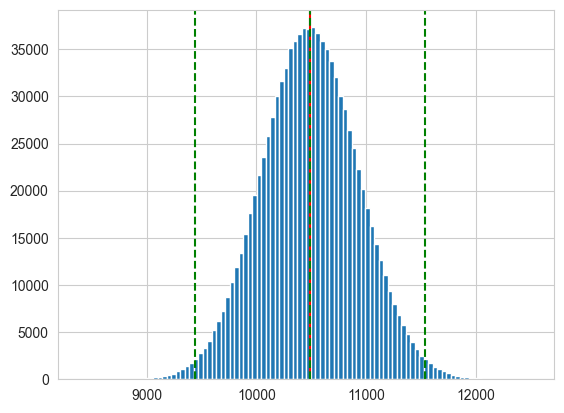

In [8]:
plt.hist(drug_costs, bins=100)
plt.axvline(np.mean(drug_costs), color='r')
plt.axvline(df_single["cost_IPTsc_drugs"].mean(), color='g', linestyle='--')

plt.axvline(df_single["cost_IPTsc_drugs"].mean()*0.9, color='g', linestyle='--')
plt.axvline(df_single["cost_IPTsc_drugs"].mean()*1.1, color='g', linestyle='--')

In [9]:
np.mean(drug_costs)

10487.195105133422

In [10]:
np.std(drug_costs)

438.4314178509631

In [11]:
np.std(drug_costs)/np.mean(drug_costs)

0.041806356557279406

In [12]:
N = 10000
overhead_costs = []
for i, row in df_single.iterrows():
    overhead_cost_low = row['cost_IPTsc_overhead_low']
    overhead_cost_high = row['cost_IPTsc_overhead_high']
    overhead_costs.extend(sample_as_normal(overhead_cost_low, overhead_cost_high, N))

In [13]:
N = 10000
itn_costs = []
for i, row in df_single.iterrows():
    itn_cost_low = row['cost_ITNs']*0.9
    itn_cost_high = row['cost_ITNs']*1.1
    itn_costs.extend(sample_as_normal(itn_cost_low, itn_cost_high, N))

In [14]:
N = 10000
treatment_costs = []
for i, row in df_single.iterrows():
    treatment_cost_low = row['cost_facility_low']
    treatment_cost_high = row['cost_facility_high']
    treatment_costs.extend(sample_as_normal(treatment_cost_low, treatment_cost_high, N))

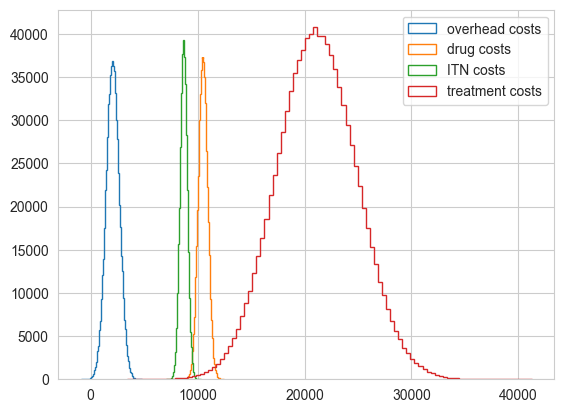

In [15]:
plt.hist(overhead_costs, bins=100, label='overhead costs', histtype='step')
plt.hist(drug_costs, bins=100, label='drug costs', histtype='step')
plt.hist(itn_costs, bins=100, label='ITN costs', histtype='step')
plt.hist(treatment_costs, bins=100, label='treatment costs', histtype='step')
plt.legend()


In [16]:
# Make tornado diagram of these cost parameters
mean_cost = df_single['cost_IPTsc_drugs'].mean() + df_single['cost_IPTsc_overhead_low'].mean() + df_single['cost_ITNs'].mean() + df_single['cost_facility_low'].mean()
print(mean_cost)
print(mean_cost-np.std(drug_costs))
print(mean_cost+np.std(drug_costs))
print(mean_cost-np.std(overhead_costs))
print(mean_cost+np.std(overhead_costs))
print(mean_cost-np.std(itn_costs))
print(mean_cost+np.std(itn_costs))
print(mean_cost-np.std(treatment_costs))
print(mean_cost+np.std(treatment_costs))

31213.568799999997
30775.137382149034
31652.00021785096
30594.215793619253
31832.921806380742
30876.277600490204
31550.85999950979
27467.858306377355
34959.27929362264


Text(0, 0.5, 'Parameter')

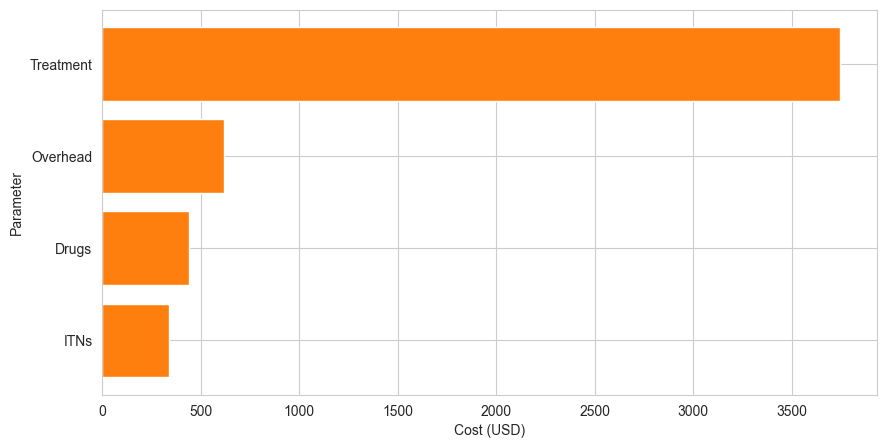

In [17]:
# Make tornado diagram of these cost parameters
plt.figure(figsize=(10, 5))
plt.barh(['ITNs', 'Drugs', 'Overhead', 'Treatment'], [np.std(itn_costs), np.std(drug_costs), np.std(overhead_costs), np.std(treatment_costs)])
plt.barh(['ITNs', 'Drugs', 'Overhead', 'Treatment'], [np.std(itn_costs), np.std(drug_costs), np.std(overhead_costs), np.std(treatment_costs)])
plt.xlabel('Cost (USD)')
plt.ylabel('Parameter')

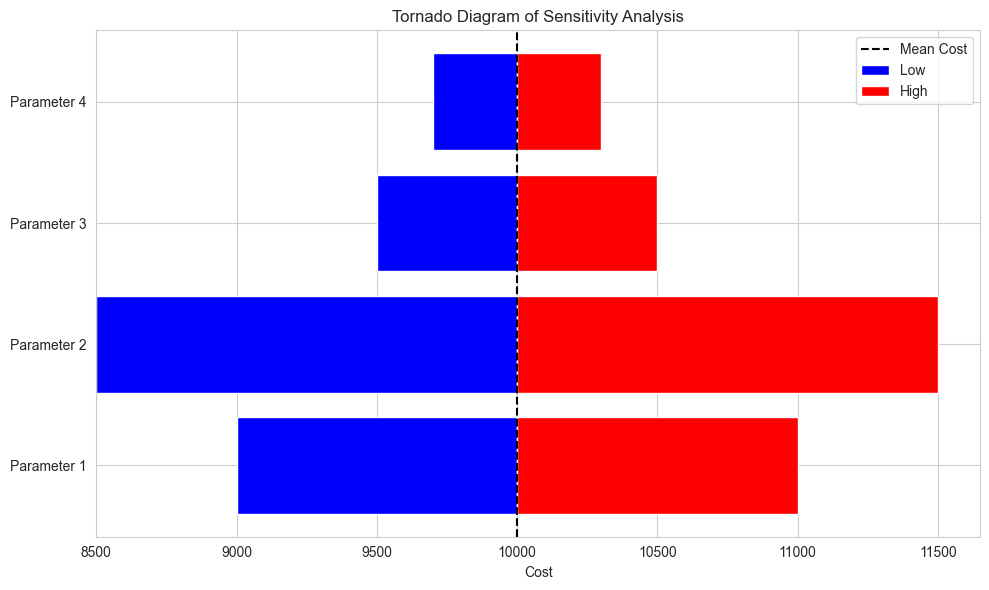

In [18]:
# Data for the tornado diagram
parameters = ['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4']
mean_cost = 10000  # Mean cost of the intervention
low_values = [9000, 8500, 9500, 9700]  # Lower bound of each parameter
high_values = [11000, 11500, 10500, 10300]  # Upper bound of each parameter

# Calculate the ranges (deviation from the mean)
low_range = [mean_cost - low for low in low_values]
high_range = [high - mean_cost for high in high_values]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for low and high ranges
ax.barh(parameters, low_range, left=[mean_cost - lr for lr in low_range], color='blue', label='Low', align='center')
ax.barh(parameters, high_range, left=mean_cost, color='red', label='High', align='center')

# Plot a vertical line at the mean cost
ax.axvline(mean_cost, color='black', linestyle='--', label='Mean Cost')

# Add labels and title
ax.set_xlabel('Cost')
ax.set_title('Tornado Diagram of Sensitivity Analysis')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
drug_costs = np.array(drug_costs)/10
overhead_costs = np.array(overhead_costs)/10
itn_costs = np.array(itn_costs)/10
treatment_costs = np.array(treatment_costs)/10

meta NOT subset; don't know how to subset; dropped


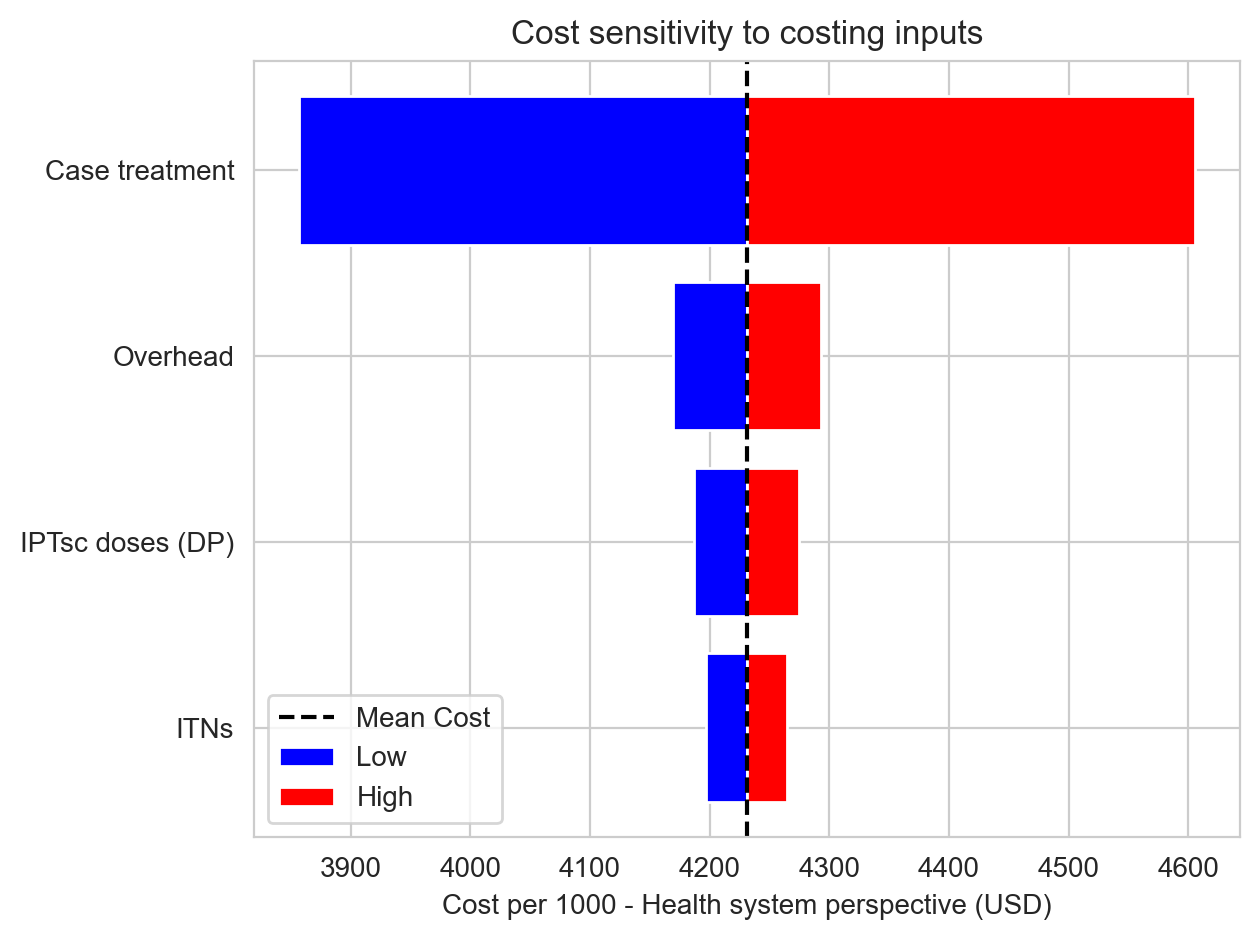

In [20]:
# Data for the tornado diagram
parameters = ['ITNs', 'IPTsc doses (DP)', 'Overhead', 'Case treatment']
mean_cost = np.mean(drug_costs) + np.mean(overhead_costs) + np.mean(itn_costs) + np.mean(treatment_costs)  # Mean cost of the intervention
low_values = [mean_cost-np.std(itn_costs), mean_cost-np.std(drug_costs), mean_cost-np.std(overhead_costs), mean_cost-np.std(treatment_costs)]  # Lower bound of each parameter
high_values = [mean_cost+np.std(itn_costs), mean_cost+np.std(drug_costs), mean_cost+np.std(overhead_costs), mean_cost+np.std(treatment_costs)]  # Upper bound of each parameter
# low_values = [9000, 8500, 9500, 9700]  # Lower bound of each parameter
# high_values = [11000, 11500, 10500, 10300]  # Upper bound of each parameter

# Calculate the ranges (deviation from the mean)
low_range = [mean_cost - low for low in low_values]
high_range = [high - mean_cost for high in high_values]

# Create figure and axes
# fig, ax = plt.subplots(figsize=(10, 6))
fig,ax = plt.subplots(dpi=200)

r = np.max(high_values)-np.min(low_values)
plt.xlim([np.min(low_values)-r*0.05,np.max(high_values)+r*0.05])
# Plot the bars for low and high ranges
ax.barh(parameters, low_range, left=[mean_cost - lr for lr in low_range], color='blue', label='Low', align='center')
ax.barh(parameters, high_range, left=mean_cost, color='red', label='High', align='center')

# Plot a vertical line at the mean cost
ax.axvline(mean_cost, color='black', linestyle='--', label='Mean Cost')

# Add labels and title
ax.set_xlabel('Cost per 1000 - Health system perspective (USD)')
ax.set_title('Cost sensitivity to costing inputs')
ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig("cost_tornado.png")
plt.savefig("cost_tornado.pdf")
plt.show()

In [21]:
df_single["cost_IPTsc_overhead_mean"] = (df_single["cost_IPTsc_overhead_low"] + df_single["cost_IPTsc_overhead_high"])/2
print(df_single["cost_IPTsc_overhead_low"]/df_single["cost_IPTsc_overhead_mean"])
print(df_single["cost_IPTsc_overhead_high"]/df_single["cost_IPTsc_overhead_mean"])

5200    0.216867
5201    0.216867
5202    0.216867
5203    0.216867
5204    0.216867
          ...   
5295    0.216867
5296    0.216867
5297    0.216867
5298    0.216867
5299    0.216867
Length: 100, dtype: float64
5200    1.783133
5201    1.783133
5202    1.783133
5203    1.783133
5204    1.783133
          ...   
5295    1.783133
5296    1.783133
5297    1.783133
5298    1.783133
5299    1.783133
Length: 100, dtype: float64


C:\Users\joshsu\AppData\Local\Temp\ipykernel_43108\1130676178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single["cost_IPTsc_overhead_mean"] = (df_single["cost_IPTsc_overhead_low"] + df_single["cost_IPTsc_overhead_high"])/2


In [22]:
df_single["cost_facility_mean"] = (df_single["cost_facility_low"] + df_single["cost_facility_high"])/2
print(df_single["cost_facility_low"]/df_single["cost_facility_mean"])
print(df_single["cost_facility_high"]/df_single["cost_facility_mean"])

5200    0.549878
5201    0.549878
5202    0.549878
5203    0.549878
5204    0.549878
          ...   
5295    0.549878
5296    0.549878
5297    0.549878
5298    0.549878
5299    0.549878
Length: 100, dtype: float64
5200    1.450122
5201    1.450122
5202    1.450122
5203    1.450122
5204    1.450122
          ...   
5295    1.450122
5296    1.450122
5297    1.450122
5298    1.450122
5299    1.450122
Length: 100, dtype: float64


C:\Users\joshsu\AppData\Local\Temp\ipykernel_43108\2749234871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single["cost_facility_mean"] = (df_single["cost_facility_low"] + df_single["cost_facility_high"])/2


meta NOT subset; don't know how to subset; dropped


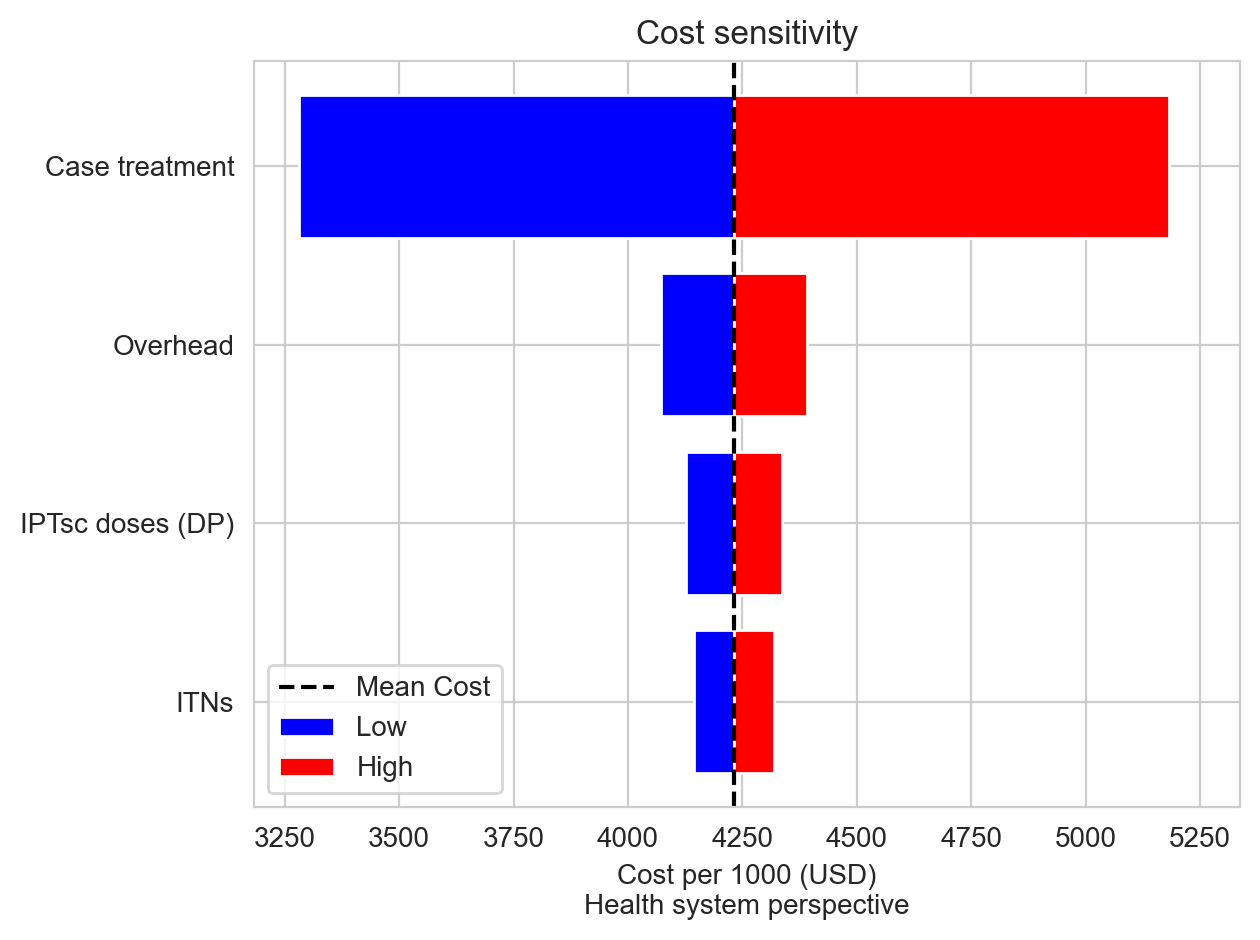

In [37]:
# Data for the tornado diagram
parameters = ['ITNs', 'IPTsc doses (DP)', 'Overhead', 'Case treatment']
mean_cost = np.mean(drug_costs) + np.mean(overhead_costs) + np.mean(itn_costs) + np.mean(treatment_costs)  # Mean cost of the intervention
low_values = [mean_cost-np.mean(itn_costs)*0.1,
              mean_cost-np.mean(drug_costs)*0.1,
              mean_cost-np.mean(overhead_costs)+np.mean(overhead_costs)*0.216867,
              mean_cost-np.mean(treatment_costs)+np.mean(treatment_costs)*0.549878]  # Lower bound of each parameter
high_values = [mean_cost+np.mean(itn_costs)*0.1,
               mean_cost+np.mean(drug_costs)*0.1,
               mean_cost-np.mean(overhead_costs)+np.mean(overhead_costs)*1.783133,
               mean_cost-np.mean(treatment_costs)+np.mean(treatment_costs)*1.450122]  # Upper bound of each parameter
# low_values = [9000, 8500, 9500, 9700]  # Lower bound of each parameter
# high_values = [11000, 11500, 10500, 10300]  # Upper bound of each parameter

# Calculate the ranges (deviation from the mean)
low_range = [mean_cost - low for low in low_values]
high_range = [high - mean_cost for high in high_values]

# Create figure and axes
fig, ax = plt.subplots(dpi=200)

plt.xlim([np.min(low_values)*0.97,np.max(high_values)*1.03])
# Plot the bars for low and high ranges
ax.barh(parameters, low_range, left=[mean_cost - lr for lr in low_range], color='blue', label='Low', align='center')
ax.barh(parameters, high_range, left=mean_cost, color='red', label='High', align='center')

# Plot a vertical line at the mean cost
ax.axvline(mean_cost, color='black', linestyle='--', label='Mean Cost')

# Add labels and title
ax.set_xlabel('Cost per 1000 (USD)\nHealth system perspective')
ax.set_title('Cost sensitivity')
ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig("cost_tornado.png")
plt.savefig("cost_tornado.pdf")
plt.show()


(array([  1.,   1.,   3.,   2.,   2.,   4.,   5.,   4.,   5.,   6.,   9.,
         14.,  14.,  18.,  16.,  22.,  25.,  38.,  34.,  45.,  44.,  49.,
         64.,  76.,  94.,  98., 105., 118., 129., 155., 159., 166., 171.,
        212., 230., 275., 210., 285., 258., 268., 283., 296., 296., 335.,
        334., 292., 267., 307., 286., 306., 285., 284., 274., 243., 226.,
        250., 197., 220., 168., 167., 154., 136., 129., 108.,  86.,  86.,
         87.,  64.,  63.,  56.,  48.,  41.,  24.,  32.,  30.,  23.,  16.,
         13.,  11.,   7.,   8.,   6.,   4.,   5.,   1.,   1.,   1.,   4.,
          3.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([130.90417051, 133.56170336, 136.2192362 , 138.87676905,
        141.53430189, 144.19183474, 146.84936758, 149.50690043,
        152.16443328, 154.82196612, 157.47949897, 160.13703181,
        162.79456466, 165.4520975 , 168.10963035, 170.76716319,
        173.42469604, 176.08222888, 178.73976173, 181.39729458

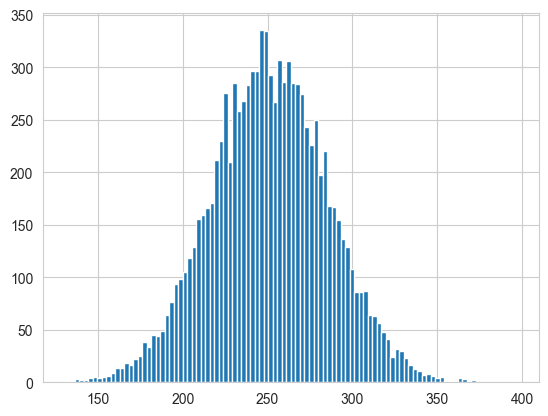

In [24]:
iptsc_cases_mean = 747.883366
iptsc_cases_std = 28.291114
no_iptsc_cases_mean = 998.606661
no_iptsc_cases_std = 20.229171

iptsc_cases = np.random.normal(iptsc_cases_mean, iptsc_cases_std, N)
no_iptsc_cases = np.random.normal(no_iptsc_cases_mean, no_iptsc_cases_std, N)
cases_averted = no_iptsc_cases - iptsc_cases

plt.hist(cases_averted, bins=100)

In [25]:
icer_mean = mean_cost / cases_averted.mean()
print(icer_mean)

16.854364531957888


2.256840012393411


meta NOT subset; don't know how to subset; dropped


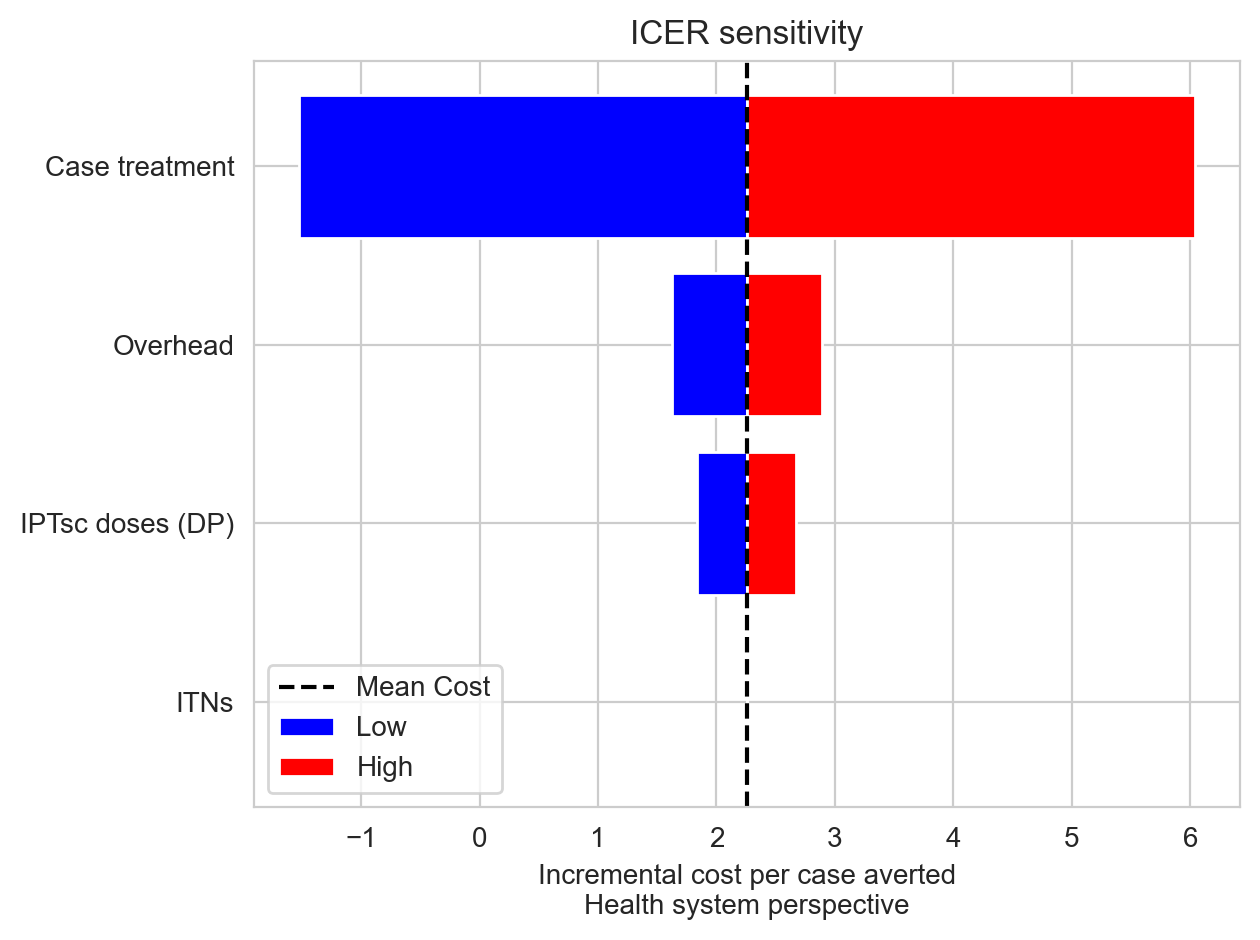

In [38]:
df_base = df[(df['archetype'] == archetype) & (df['scenario_number'] == 0) & (df['transmission_level'] == transmission)]
base_mean_cost = 3664.5

mean_icer = (mean_cost-base_mean_cost) / cases_averted.mean()
print(mean_icer)

low_values = [(mean_cost-base_mean_cost) / cases_averted.mean(),
              (mean_cost-np.mean(drug_costs)*0.1-base_mean_cost) / cases_averted.mean(),
              (mean_cost-np.mean(overhead_costs)+np.mean(overhead_costs)*0.216867 - base_mean_cost) / cases_averted.mean(),
              (mean_cost-np.mean(treatment_costs)+np.mean(treatment_costs)*0.549878 - base_mean_cost) / cases_averted.mean() ]  # Lower bound of each parameter
high_values = [(mean_cost-base_mean_cost) / cases_averted.mean(),
                (mean_cost+np.mean(drug_costs)*0.1-base_mean_cost) / cases_averted.mean(),
                (mean_cost-np.mean(overhead_costs)+np.mean(overhead_costs)*1.783133 - base_mean_cost) / cases_averted.mean(),
                (mean_cost-np.mean(treatment_costs)+np.mean(treatment_costs)*1.450122 - base_mean_cost) / cases_averted.mean()]  # Upper bound of each parameter

# Calculate the ranges (deviation from the mean)
low_range = [mean_icer - low for low in low_values]
high_range = [high - mean_icer for high in high_values]

# Create figure and axes
fig, ax = plt.subplots(dpi=200)

r = np.max(high_values)-np.min(low_values)
plt.xlim([np.min(low_values)-0.05*r,np.max(high_values)+0.05*r])
# Plot the bars for low and high ranges
ax.barh(parameters, low_range, left=[mean_icer - lr for lr in low_range], color='blue', label='Low', align='center')
ax.barh(parameters, high_range, left=mean_icer, color='red', label='High', align='center')

# Plot a vertical line at the mean cost
ax.axvline(mean_icer, color='black', linestyle='--', label='Mean Cost')

# Add labels and title
ax.set_xlabel('Incremental cost per case averted\nHealth system perspective')
ax.set_title('ICER sensitivity')
ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig("icer_tornado.png")
plt.savefig("icer_tornado.pdf")
plt.show()


In [31]:
mean_iptsc_cost = np.mean(drug_costs) + np.mean(overhead_costs)

4.987875676781315


meta NOT subset; don't know how to subset; dropped


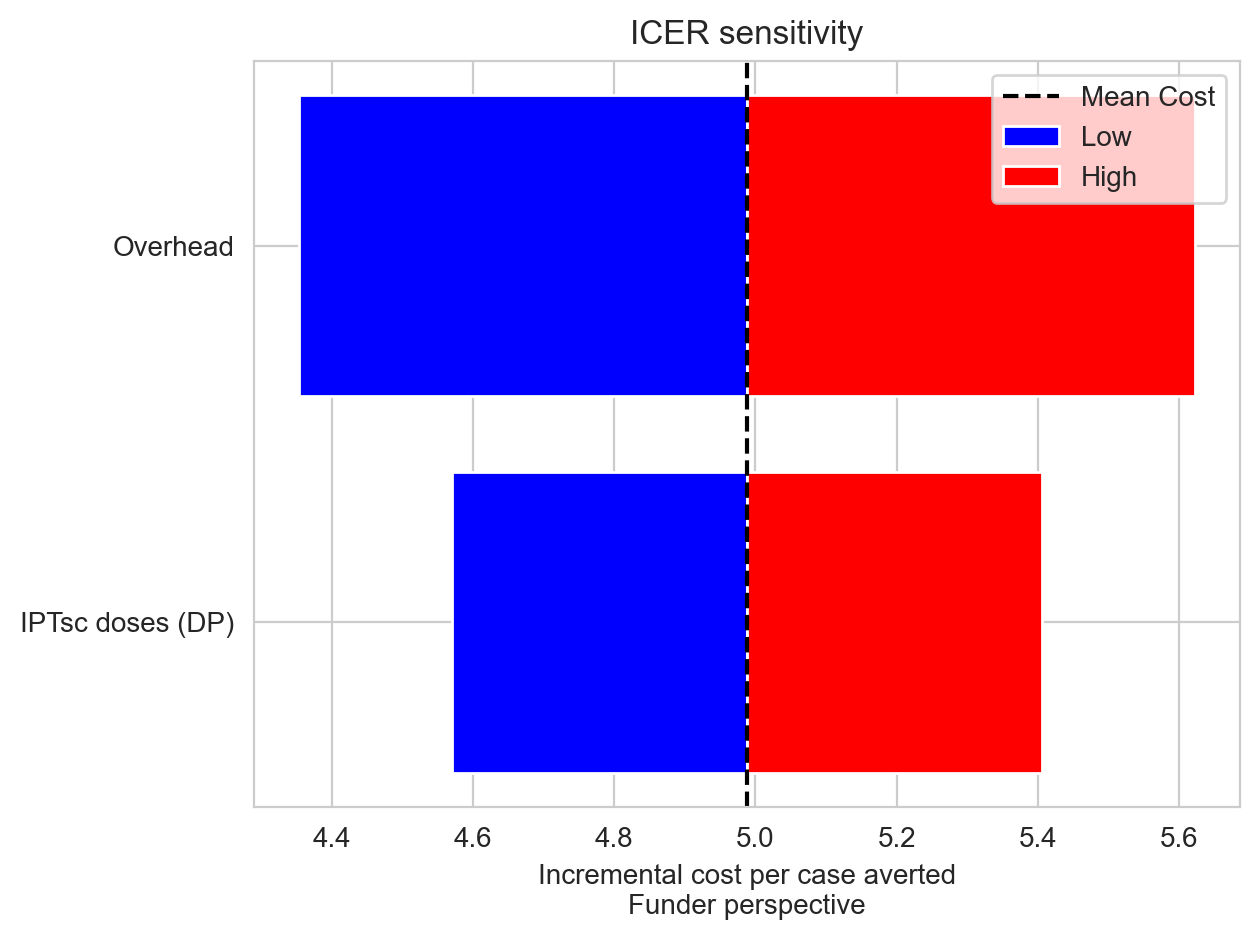

In [39]:
mean_funder_icer = (mean_iptsc_cost-0) / cases_averted.mean()
print(mean_funder_icer)

plot_parameters = ['IPTsc doses (DP)', 'Overhead']

low_values = [(mean_iptsc_cost-np.mean(drug_costs)*0.1) / cases_averted.mean(),
              (mean_iptsc_cost-np.mean(overhead_costs)+np.mean(overhead_costs)*0.216867) / cases_averted.mean()]  # Lower bound of each parameter
high_values = [(mean_iptsc_cost+np.mean(drug_costs)*0.1) / cases_averted.mean(),
                (mean_iptsc_cost-np.mean(overhead_costs)+np.mean(overhead_costs)*1.783133) / cases_averted.mean()]  # Upper bound of each parameter

# Calculate the ranges (deviation from the mean)
low_range = [mean_funder_icer - low for low in low_values]
high_range = [high - mean_funder_icer for high in high_values]

# Create figure and axes
fig, ax = plt.subplots(dpi=200)

r = np.max(high_values)-np.min(low_values)
plt.xlim([np.min(low_values)-0.05*r,np.max(high_values)+0.05*r])
# Plot the bars for low and high ranges
ax.barh(plot_parameters, low_range, left=[mean_funder_icer - lr for lr in low_range], color='blue', label='Low', align='center')
ax.barh(plot_parameters, high_range, left=mean_funder_icer, color='red', label='High', align='center')

# Plot a vertical line at the mean cost
ax.axvline(mean_funder_icer, color='black', linestyle='--', label='Mean Cost')

# Add labels and title
ax.set_xlabel('Incremental cost per case averted\nFunder perspective')
ax.set_title('ICER sensitivity')
ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig("funder_icer_tornado.png")
plt.savefig("funder_icer_tornado.pdf")
plt.show()


In [33]:
mean_icer

2.256840012393411

In [29]:
mean_cost-np.mean(treatment_costs)+np.mean(treatment_costs)*0.549878

3280.883049747429

In [30]:
base_mean_cost

3664.5